02　重みの初期値
==============

* ニューラルネットワークの学習で特に重要となってくるのが、「重みの初期値」

* 重みの初期値としてどのような値を設定するかで、ニューラルネットワークの学習の成否が分かれることがある

* 本節では、推奨される重みの初期値について説明し、実験によって実際にニューラルネットワークの学習が速やかに行われることを確認する

## 1.重みの初期値を0にする？

* 過学習を抑え、汎化性能を高めるテックニックとして`Weight decay`(荷重減衰)という手法を扱う

    * この手法は、重みパラメータの値が小さくなるように学習を行うことを目的とした手法
    
    * 重みの値を小さくすることで、過学習が起きにくくなる

* 重みを小さい値にしたければ、初期値も出来るだけ小さい値からスタートするのが正攻法

    * 実際、これまで重みの初期値は、`0.01 * np.random.randn(10, 100)`のようにガウス分布から生成される値を0.01倍した小さな値を用いた
    
    > これは、標準偏差が0.01のガウス分布

* 重みの値を小さくしたい場合に、重みの初期値を0にすると正しい学習が行えなくなる

* この理由としては、重みを均一な値にすると誤差逆伝播法において、全ての重みの値が均一に更新されてしまうため

    * これでは、たくさんの重みを持つ意味がなくなる
    
    * 重みの対称的な構造を崩すために、ランダムな初期値が必要になる

## 2.隠れ層のアクティベーション分布

* 隠れ層のアクティベーション(活性化関数の後の出力データ)の分布を観察することで、多くの知見が得られる

* ここでは、重みの初期値によって隠れ層のアクティベーションがどのように変化するか、実験を行う

    * 例)5層のニューラルネットワーク(活性化関数：シグモイド関数)に、ランダムに生成した入力データを流し、各層のアクティベーションのデータ分布をヒストグラムで描画する

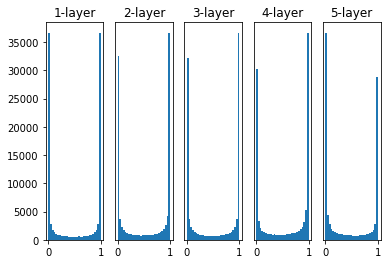

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

* ここでは、5つの層があり、それぞれの層は100個のニューロンを持つものとする

    * そして、入力データとして、1,000個のデータをガウス分布でランダムに生成し、それを5層のニューラルネットワークに渡す
    
    * 活性化関数にはシグモイド関数を利用し、各層のアクティベーションの結果を`activations`という変数に格納する
    
    * ここで、標準偏差が1のガウス分布を用いて考えると、以下のように0と1に偏った分布になる
    
    * これは、`勾配消失`と呼ばれる問題が発生する

* 次に、重みの標準偏差を0.01として同じ実験を行う

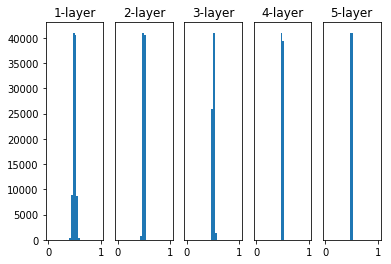

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
#     w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

* 今度は、0.5付近に集中する分布となった

    * 先ほどの例のように、0と1への偏りはないので、勾配消失の問題は発生しない
    
* しかし、アクティベーションに偏りがあるということは、複数のニューロンが存在する必要がなくなるという問題が発生する

> 各層のアクティベーションの分布は、適度な広がりを持つことが求められる
>
> 適度に多様性のあるデータが各層を流れることで、ニューラルネットワークの学習が効率的に行えるため
>
> 逆に、偏ったデータが流れると、勾配消失や「表現力の制限」が問題になって、学習がうまくいかない場合がある

* 次にXavier Glorotらの論文で推奨される重みの初期値を使う

* 各層のアクティベーションを同じ広がりのある分布にすることを目的として、適切な重みのスケールを導く

    * その導き出した結論は、前層のノードの個数を$n$とした時、$\frac{1}{\sqrt{n}}$の標準偏差を使う分布を使うというもの
    
![Xavierの初期値](./images/Xavierの初期値.png)

* 「Xavierの初期値」を用いると、前層のノードが多ければ多いほど、対象ノードの初期値として設定する重みのスケールは小さくなる

    * 実験コードの実装は、重みの初期値設定を書き換えるだけ

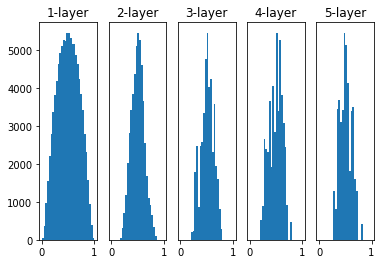

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
#     w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

* 上の結果より、上位の層に行くに連れて、これまでよりも広がりを持った分布になる

* 各層に流れるデータには適度な広がりがあるので、シグモイド関数の表現力も制限されることなく、効率的に学習が行えることが期待できる

## 3.ReLUの場合の重みの初期値

* 「Xavierの初期値」は、活性化関数が線形であることを前提に導いた結果

* sigmoid関数やtanh関数は左右対称で中央付近が線形関数としてみなせるので、「Xavierの初期値」が適している

* しかし、ReLUを用いる場合は、ReLUに特化した初期値を用いることが推奨される

    * この初期値は、「Heの初期値」

* 「Heの初期値」：前層のノードの数が$n$個の場合、$\frac{2}{\sqrt{n}}$を標準偏差とするガウス分布を用いる

    * ReLUの場合は負の領域が0になるため、より広がりを持たせるために倍の係数が必要になる
    
* 以下の図に、活性化関数にReLUを用いた場合のアクティベーションの分布を見てみる

    * ここでは、標準偏差が0.01のガウス分布、ReLU専用の「Heの初期値」のばいいの3つの実験結果を示す
    
![活性化関数としてReLUを使用した場合の重みの初期値によるアクティベーション分布の変化](./images/活性化関数としてReLUを使用した場合の重みの初期値によるアクティベーション分布の変化.png)

* 実験の結果を見ると、「std=0.01」の場合、各層のアクティベーションはとても小さな値となる

    * ニューラルネットワーク上をとても小さなデータが流れるということは、逆伝播の際の重みの勾配も同様に小さくなるということ
    
    * これは重大な問題であり、実際には学習がほとんど進まない

* 「Xavierの初期値」の結果は、層が深くなるにつれ、偏りが少しずつ大きくなっていく

    * 実際、層をディープにしていくと、アクティベーションの偏りも大きくなり、学習の際に「勾配消失」が問題になる
    
* 一方、「Heの初期値」は各層で分布の広がりが均一になる

    * データの広がりが層を深くしても均一に保たれるので、逆伝播の際にも適切な値が流れると期待できる
    
* 以上より、活性化関数にReLUを使う場合は、「Heの初期値」、sigmoidやtanhなどのS字カーブの時には、「Xavierの初期値」を使うことが現時点でベスト

## 4.MNISTデータセットによる重み初期値の比較

* 実際のデータを対象に、重みの初期値の与え方の違いによって、ニューラルネットワークの学習にどれだけ影響を与えるかを見る

    * 「std=0.01」
    
    * 「Xavierの初期値」
    
    * 「Heの初期値」
    
* 実際のコードは、以下の通りになる

===========iteration:0===========
std=0.01:2.302507177158687
Xavier:2.3117708561904617
He:2.359101042602123
===========iteration:100===========
std=0.01:2.3020753831767866
Xavier:2.2045610417402344
He:1.3016065145916138
===========iteration:200===========
std=0.01:2.301556907406096
Xavier:1.988892676869082
He:0.6244731097236165
===========iteration:300===========
std=0.01:2.3025851579491334
Xavier:1.511924138424626
He:0.4503031064757209
===========iteration:400===========
std=0.01:2.3002093828382617
Xavier:0.8795101533583809
He:0.3388155840671754
===========iteration:500===========
std=0.01:2.299787886080134
Xavier:0.7314000460265023
He:0.3744510957486918
===========iteration:600===========
std=0.01:2.3016545424720123
Xavier:0.6085281961668644
He:0.3903385256160746
===========iteration:700===========
std=0.01:2.305030537176723
Xavier:0.4586938774950207
He:0.24551619382225257
===========iteration:800===========
std=0.01:2.301471471830757
Xavier:0.38265028770142123
He:0.23754861042276154

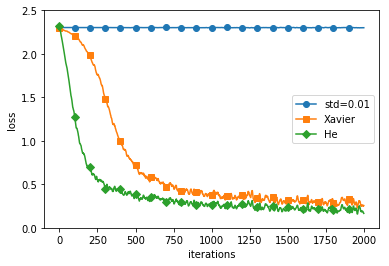

In [4]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()

* この実験では、5層のニューラルネットワーク(各層100個のニューロン)で、活性化関数としてReLUを使用する

* 結果より、「std=0.01」の時は全く学習ができていない

    * これは、先ほどアクティベーションの分布を観察した時の通り、順伝播では小さな値(0に集中したデータ)が流れるため
    
    * それによって、逆伝播の際に求める勾配も小さくなり、重みの更新がほとんど行われなくなる
    
* 逆に、XavierとHeの初期値の場合は、順調に学習が行われている

    * Heの初期値の方が、学習の進みが速くなっている

* ニューラルネットワークの学習において、重みの初期値はとても重要なポイント

    * 重みの初期値によって、ニューラルネットワークの学習の成否が分かれることが多くある
   

| 版   | 年/月/日   |
| ---- | ---------- |
| 初版 | 2019/05/12 |